# Titanic Kaggle

## Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

from statistics import mean
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load 

In [2]:
train = pd.read_csv('data/train.csv', sep = ',')
train.set_index('PassengerId', inplace=True, drop=True)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Colonne numériques et catégorielles

In [9]:
col_num = ['Pclass','Age','SibSp','Parch','Fare']
col_cat = ['Name','Sex','Ticket','Cabin','Embarked']
col_label = 0

In [10]:
def parse_model_0(X) :
    target = X.Survived
    X = X[col_num]
    return X, target

In [13]:
X, y = parse_model_0(train.copy())
X.head(5)

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


## Etude des variables

In [14]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

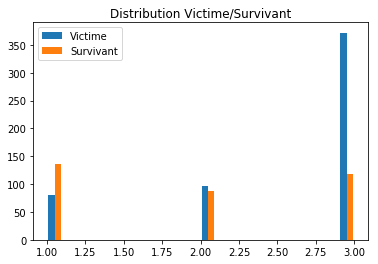

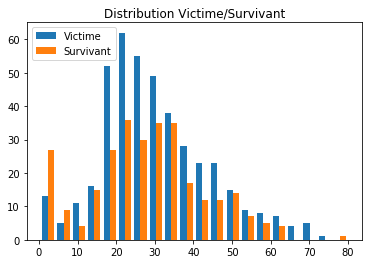

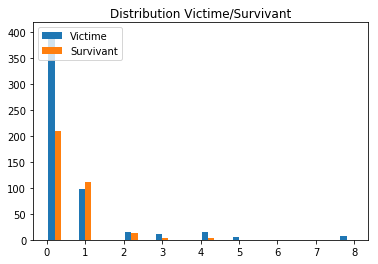

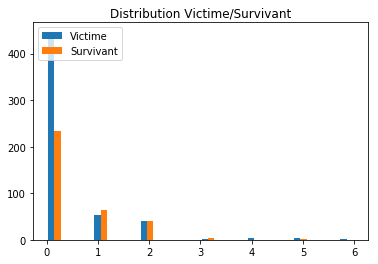

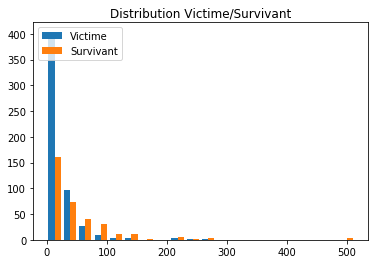

In [19]:
def plot_hist(feature):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1,x2], label=['Victime','Survivant'], bins = 20)
    plt.legend(loc = 'upper left')
    plt.title('Distribution Victime/Survivant')
    plt.show()
for col in col_num:
    plot_hist(col)

## Transformation des variables catégorielle

In [20]:
X_cat = np.copy(X[:,col_cat])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx 

imp_cat = Imputer(missing_values=0, strategy='most_frequent') 
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

TypeError: unhashable type: 'slice'

## Validation croisée

In [24]:
def compute_score(clf, X, y): 
    xval = cross_val_score(clf, X, y, cv = 5)
    return mean(xval)

In [25]:
lr = LogisticRegression()
compute_score(lr, X, y)

0.67454885776833495